# Linear Models and Regularization
#Abhimanyu Kumar


###1. Write a function to generate an input data matrix X of size NxD for regression.

In [ ]:
#import required library pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#for graph plot

In [ ]:

def generate_input_matrix(N, S):#define function with taking input N and matrix S
    random_matrix = np.random.normal(0, 1, (N, M)).astype(int)#Generate a random 2-D array of size NxM with standard normal distribution.here i taken int type ,can take float type also
    print("generated a random 2-D array of size NxM is \n" +str(random_matrix))#printed random 2-D array of size NxM with standard normal distribution
    X = random_matrix @ S  # Multiply the random matrix by the generator matrix S(also called dot product)
    return X#this will return x4

#Here I am taking value of N,M,D using "input" fuction
N=int(input("Take value of N: ")) #Take sample size
M =int(input("Take value of M: "))#value of M
D=int(input("Take value of D: "))#value of D

# generator matrix S (M x D)
# Create a random matrix S of size M x D.
# S = np.random.rand (M, D)
#  random integers between 1 and 30. Note we can take any range as per requirement.
S = np.random.randint(1, 30, size=(M,D), dtype=int)
print("generated matrix S of size (M x D) is \n" +str(S))#printed matrix S

# Generate the input data matrix X
X = generate_input_matrix(N, S)

# Display the resulting matrix X
print("Generated input data matrix X:\n")
print(X)#print matrix X of size NxD



Take value of N: 9
Take value of M: 6
Take value of D: 7
generated matrix S of size (M x D) is 
[[16 28  9 17 24 27 26]
 [ 2 25 20 23  6 17  4]
 [ 5 15  1 11 28  2 10]
 [16  1  8 21 17 25 26]
 [14  6 12 25 12 27 26]
 [24  3 17 15 20 17 15]]
generated a random 2-D array of size NxM is 
[[-1  0  0 -1  0  0]
 [-1 -1  1  0  0 -2]
 [ 0  1 -1  0  0  0]
 [ 0  1  1  0  1 -1]
 [-1  0  0  0  1  0]
 [ 1  1  1 -1  0 -2]
 [-2  1  0  0  0 -1]
 [ 0  0  0  1 -1  2]
 [ 0  0  0 -1  0  0]]
Generated input data matrix X:

[[-32 -29 -17 -38 -41 -52 -52]
 [-61 -44 -62 -59 -42 -76 -50]
 [ -3  10  19  12 -22  15  -6]
 [ -3  43  16  44  26  29  25]
 [ -2 -22   3   8 -12   0   0]
 [-41  61 -12   0   1 -13 -16]
 [-54 -34 -15 -26 -62 -54 -63]
 [ 50   1  30  26  45  32  30]
 [-16  -1  -8 -21 -17 -25 -26]]


##Observation  
1st I generated a random matrix S.Taking matrix S  and N as  input.Generated random matrix of size NxM with standard normal distribution. By taking example N=7, M=6, N=3 I verified it.

###2. Write a function to generate the target vector t of size Nx1:

In [ ]:
def generate_input_matrix(X, w, noiseVariance):#define function with taking input matrix X , weight vector w of size D+1 and noiseVariance
    #check dimension mismatch
    if len(w) != D + 1:
        raise ValueError(f"Dimension mismatch: X is of shape {X.shape}, but w should be of length {D+1}")


    # Separate the bias term (first element of w)
    bias = w[0]

    weights = w[1:]  # This is a 1D array of shape (D,) from 2nd element to D+1 th element


    # Compute the target vector t = X @ weightsTranspose + bias without add of zero-mean Gaussian noise
    t = X @ weights + bias
     #noise generate
    noise = np.random.normal(0, np.sqrt(noiseVariance), size=(N,))#here generating standard normal distribution, So taken mean=0, std. Dev. =square root of varience

    # Compute the target vector t = X @ weightsTranspose + bias + noise. this is with add of zero-mean Gaussian noise
    t += noise

    return t.reshape(N, 1)#this will reshape in desire dimension


#Here I am taking value of N,D and noiseVariance  using "input" fuction
N=int(input("Take value of N: ")) #Take sample size
noiseVariance =int(input("Take value of Noise Variance: "))#value of M
D=int(input("Take value of D: "))#value of D

# generator matrix X (N x D)
# Create a matrix X of size N x D.
X = np.random.rand(N, D)
w=np.random.rand(D+1)#create weight vector w of size D+1

#print X and W
print("matrix X of size M x D is "+str(X))
print("matrix W of size  D+1 is "+str(w))

targetVector = generate_input_matrix(X, w, noiseVariance)#call function that will return t.

# Display the resulting matrix X
print("generated the target vector t of size Nx1 is \n" +str(targetVector))#print matrix X of size NxD




Take value of N: 9
Take value of Noise Variance: 4
Take value of D: 6
matrix X of size M x D is [[0.63408935 0.53915347 0.09143184 0.52568807 0.28190439 0.35158382]
 [0.59739669 0.76215112 0.23548311 0.55938778 0.05889478 0.38358818]
 [0.16805561 0.6758593  0.41183288 0.76769041 0.23974905 0.01535589]
 [0.35112756 0.54914164 0.38216652 0.87173133 0.84304356 0.54643395]
 [0.65573554 0.68159726 0.79461941 0.23878096 0.0728151  0.23668857]
 [0.36574265 0.81813299 0.06867488 0.25440801 0.2270366  0.74643237]
 [0.81275165 0.66204887 0.53521492 0.32692624 0.62520479 0.94476308]
 [0.35210845 0.38379707 0.42251668 0.26576087 0.5657755  0.70773842]
 [0.25762698 0.24986055 0.98796449 0.0910401  0.16412659 0.73317391]]
matrix W of size  D+1 is [0.08943923 0.48049931 0.562324   0.24201579 0.33166559 0.51783207
 0.35357685]
generated the target vector t of size Nx1 is 
[[ 1.23684623]
 [-1.39295085]
 [ 5.58702974]
 [ 0.26066246]
 [ 0.41607421]
 [-0.01285693]
 [-0.06466447]
 [ 0.75994613]
 [ 0.531532

#Observation
generated randonm matrix x and w. w of D+1 size. take w[0] as bias. Note here I note taken transpose of w (can take using w.T command) because numpy adjust it accordingly.

###3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N (use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve the problem above a particular value of N? What could be the reason for the same?

(99510, 10)
(99510,)
(10,)


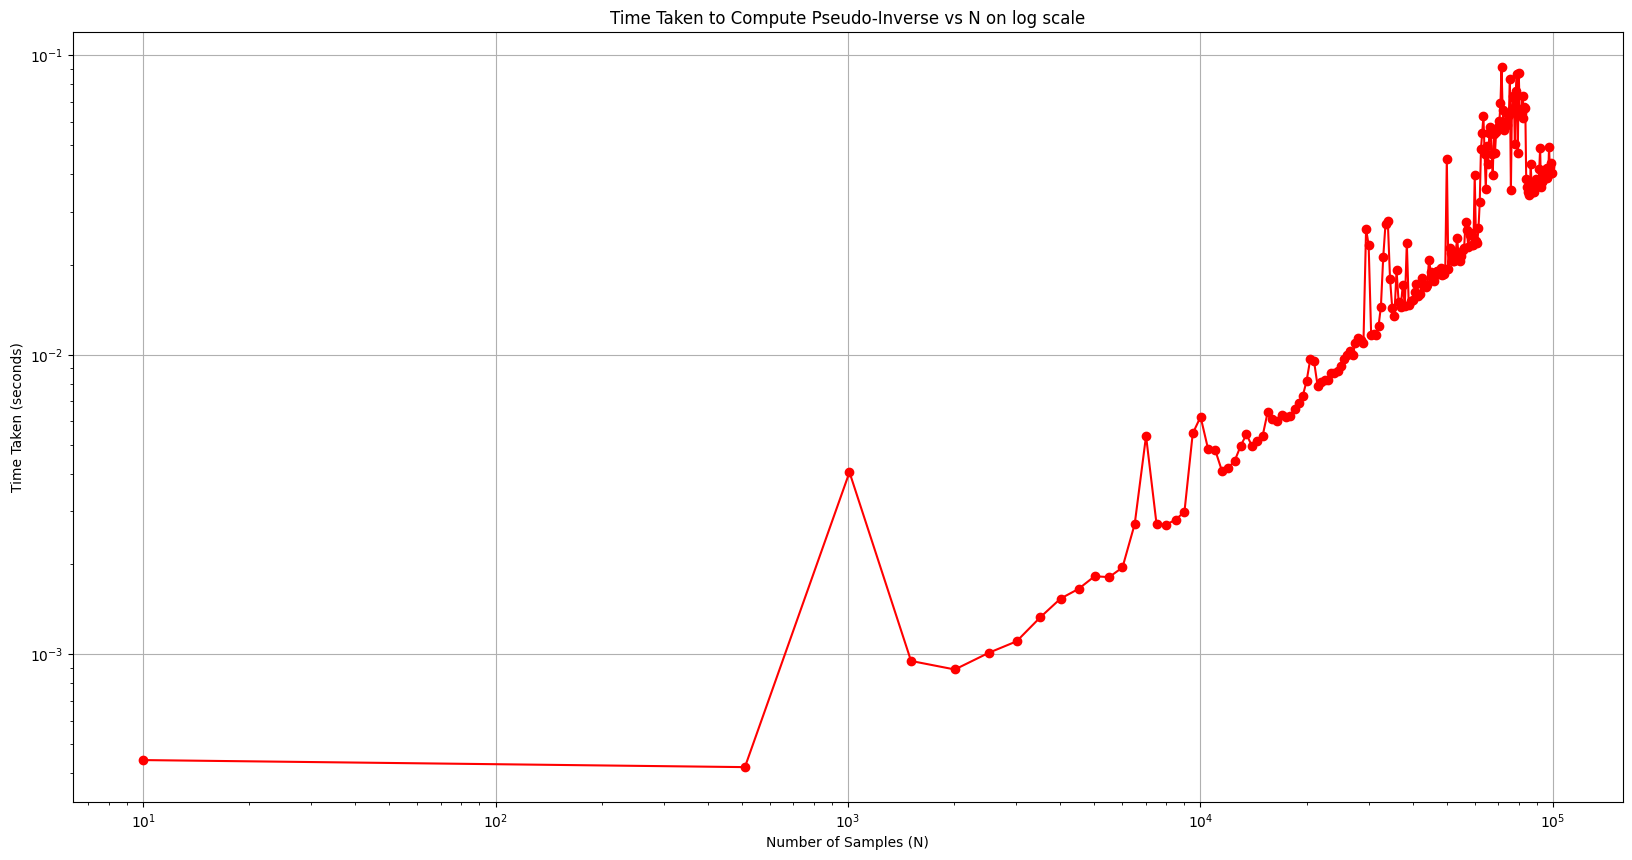

In [ ]:

import matplotlib.pyplot as plt#for graph plot
import time #import time library to measure time

# Fixed number of features
D = 10

# Initialised to record N value and time taken
N_values = []
time_taken = []

# Range of N values
for N in range(10, 100001, 500):  # Taking value of N from 10 to 100001 in step of 500. We can take any range and step
    # Generate random mattrix  X of size (N, D) and y of size (N)
    X = np.random.rand(N, D)
    y = np.random.rand(N)

    # Measure the time taken to compute pseudo-inverse
    start_time = time.time()#start time measuring

    w = np.linalg.pinv(X) @ y#inverse of X give weights of mattrix y to solve linear regression.

    elapsed_time = time.time() - start_time#calculate total time to compute above expression.

    # Append both Record the size and time to initialised N_values and time_taken
    N_values.append(N)
    time_taken.append(elapsed_time)

#additional I print shape for more clearity about mattrix multiplication
print(X.shape)
print(y.shape)
print(w.shape)

# Plot the results
plt.figure(figsize=(20, 10))
plt.loglog(N_values, time_taken, marker='o', c='r')
plt.title('Time Taken to Compute Pseudo-Inverse vs N on log scale')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()




#Observation
For small value of N graph is approx linear.As value of N increase the nature of graph is changing in other word graph nature become quadratic and cubic.


At some value of N, significant spikes  occur due to memory or computational issues.Also observed that as N increase more peaks display.








##4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y.

In [ ]:
def caculateNRMSE(t,y):#define function

  #print target vector t and predicted vector y
   print("Target vector t is " +str(t))
   print("Predicted vector y is " +str(y))

   MSE=np.mean((t-y)**2)  # calculate mean square error

   RMSE=np.sqrt(MSE)  #calculate root mean square error

   Range=(np.max(t)-np.min(t))#calcuated range of t

   NRMSE=(RMSE/Range)# calculated normalized root mean squared error

   return NRMSE#this will return NRMSE



#take value of N that is total number of element in p or q
N=int(input("Take vakue of N: "))
#creat Random vector p and q
p=np.random.rand(N)
q=np.random.rand(N)



#call function that will return NRMSE
Calculated_NRMSE=caculateNRMSE(p,q)
#print NRMSE
print("the normalized root mean squared error between target vector t and predicted vector y is " +str(Calculated_NRMSE))




Take vakue of N: 8
Target vector t is [0.77069366 0.32648634 0.86978595 0.57924342 0.5000688  0.97878465
 0.36153743 0.29447615]
Predicted vector y is [0.52962371 0.13776094 0.58365359 0.68809167 0.91245872 0.4506491
 0.21678173 0.39714432]
the normalized root mean squared error between target vector t and predicted vector y is 0.4222518395028302


#Observation
The Normalized Root Mean Squared Error (NRMSE) function effectively calculates the relative error between the target values and predicted values.The NRMSE metric is particularly useful when comparing the performance of models across datasets with different ranges, as it provides a consistent way to interpret the relative error.








In [ ]:
#take value of N and M
M=int(input("Take vakue of M: "))
N=int(input("Take vakue of N: "))

#note I am using this value in further question to avoid size conflict of matrice or vectors and taking value again and again

Take vakue of M: 8
Take vakue of N: 6


##5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression. Figure out what should be the inputs and outputs.

In [ ]:

def mse_gradient(X, y_true, W):
  # Number of samples
    n_samples = X.shape[0]

    # Predicted values (y_hat)
    y_pred = X.dot(W)
    #print y_predicted

    print( "predicted : \n" +str(y_pred))

    # error (y_true - y_pred)
    error = y_true - y_pred
     #print error
    print("error:\n" +str(error))
    # Gradient of MSE with respect to W
    grad_W = 2/n_samples * X.T.dot(abs(error))

    return grad_W #returning grad_W





#creat Random vector X of size (M,N) and W of size (N,1)
 # Feature matrix (M samples, N features)

#  random integers between 1 and 10. Note we can take any range as per requirement.
X = np.random.randint(-5, 5, size=(M,N), dtype=int)

# Initial weights
W = np.random.randint(-5, 5, size=(N), dtype=int)
y_true= np.random.randint(-5, 5,size=(M), dtype=int) # True target values of size (M,1)




#print x,w and y_true
print("Feature matrix X is \n"+str(X))
print(" Initial weights W is \n"+str(W))
print("True target values y_true is \n"+str(y_true))

# Calculate the gradient
grad_MSE = mse_gradient(X, y_true, W)
print( "gradient ofMSE with respect to weights of linear regression is \n" +str(grad_MSE))





Feature matrix X is 
[[ 4 -4 -2 -3  1  0]
 [ 1 -3  1  1  1  0]
 [ 1  2 -3 -4 -4 -3]
 [-3 -1  4  2  3 -2]
 [ 0 -2  0  0  3 -3]
 [ 4 -4  4  0  1 -1]
 [-2 -5  2 -2 -4 -4]
 [ 2  2  0 -4 -1 -4]]
 Initial weights W is 
[ 1 -2 -1  3 -4 -2]
True target values y_true is 
[ 3  4 -1 -5 -2 -1  1 -5]
predicted : 
[ 1  5 10 -7 -2  6 24 -2]
error:
[  2  -1 -11   2   0  -7 -23  -3]
gradient ofMSE with respect to weights of linear regression is 
[  0.5  -32.    11.5  -25.75 -30.75 -37.  ]


#Observation
the inputs  of this is X(feature amtrix), y_true(actual or true data matrix), W(weights matrix)   and outputs is gradient of MSE with respect weights of linear regression.

##6. Write a function to calculate gradient of L2 norm of weights with respect to weights.

In [ ]:


def gradient(W):#define function to calculate gradient
  magnitude_W=np.linalg.norm(W)#this calculate magnitude of weight  matrix or vector
  print("magnitude of w is \n"+str(magnitude_W))#print magnitude of w

  if magnitude_W==0 :#to handle for the case of 0
       grad=0  #gradient is 0
       return grad#return gradient=0
  else:  #if magnitude_W is not the case of 0
    #ElelmentSum=np.sum(np.square(W))
   grad=W/magnitude_W  #gradient is w/magnitude of w
   return grad #returning grad


#take value of N. this is size of weight matrix
# N=int(input("Take vakue of N (size of matrix): "))


#creat Random vector weight of size (N)
# W1 = np.random.rand(N)
W1 = np.random.randint(-5, 5, size=(N), dtype=int)#  weights matrix or vector
#print x,w and y_true
print(" weights W is \n"+str(W1))

# Calculate the gradient
gradL2 = gradient(W1)
print( "gradient of L2 norm of weights with respect to weights is \n" +str(gradL2))





 weights W is 
[-1  2 -5 -1 -2 -5]
magnitude of w is 
7.745966692414834
gradient of L2 norm of weights with respect to weights is 
[-0.12909944  0.25819889 -0.64549722 -0.12909944 -0.25819889 -0.64549722]


#Observation
If the L2 norm (magnitude) of the weights is zero, the gradient is undefined because dividing by zero is mathematically invalid. To handle this, the gradient is set to zero when the L2 norm is zero. This prevents errors during computation and ensures stability.

##7.Write a function to calculate gradient of L1 norm of weights with respect to weights

In [ ]:


def gradient(W):#define function to calculate gradient
  magnitude_W=np.linalg.norm(W)#this calculate magnitude of weight  matrix or vector
  print("magnitude of w is \n"+str(magnitude_W))#print magnitude of w
  grad = np.sign(W)#calculate signum function which mean it calculate gradient of w with respect to w
  return grad #returning grad


#take value of N. this is size of weight matrix
# N=int(input("Take vakue of N (size of matrix): "))


#creat Random vector weight of size (N)

W1 = np.random.randint(-5, 5, size=(N), dtype=int)#  weights matrix or vector
#print x,w and y_true
print(" weights W is \n"+str(W1))

# Calculate the gradient
gradL1 = gradient(W1)
print( "gradient of L1 norm of weights with respect to weights is \n" +str(gradL1))





 weights W is 
[-1  3  2 -3 -2  0]
magnitude of w is 
5.196152422706632
gradient of L1 norm of weights with respect to weights is 
[-1  1  1 -1 -1  0]


#Observation
The L1 norm of a vector w is defined as the sum of the absolute values of the vector components:
The gradient of the L1 norm with respect to the weights w is not differentiable at zero
because the absolute value function is non-differentiable at zero.
However, we can define the subgradient of the L1 norm, which is:
gradient(w)=sign(Wi)  =>sign mean signum function
gradient=1 if wi>0,   -1 if wi<0,  Undefined at 𝑤𝑖=0 , but we can define the subgradient at
𝑤𝑖=0​  to be any value in [−1,1] for practical purposes.In practice, we often use 0 as the subgradient for wi=0 for simplicity

##8. Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. Use anappropriate stopping criterion.

In [ ]:
 # note:-  I solve this question without vectorization
 #preveous question i solve with vectorization.So I not used preveous question gradient of MSE, L1 and L2


def gradient_descent(w,X, y, lambda1, lambda2, learning_rate, tolerance, max_iter):



    cost_history = []

    # Define the cost function (MSE + L1 + L2)
    def compute_cost(X, y, w, lambda1, lambda2):
        predictions = X @ w
        mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        l1 = lambda1 * np.sum(np.abs(w))
        l2 = (lambda2 / 2) * np.sum(w ** 2)
        return mse + l1 + l2

    # Gradient descent loop
    for i in range(max_iter):
        predictions = X @ w
        errors = predictions - y

        # Compute gradient (MSE gradient + L1 + L2 regularization gradients)
        gradient = (1 / m) * (X.T @ errors) + lambda1 * np.sign(w) + lambda2 * w

        # Update weights
        w -= learning_rate * gradient

        # Compute new cost
        cost = compute_cost(X, y, w, lambda1, lambda2)
        cost_history.append(cost)

        # Check stopping criterion (convergence)
        if i > 0 and np.abs(cost_history[i] - cost_history[i-1]) < tolerance:
            break

    return w, cost_history


#taking M,N value from define above Q5
L1=0.1
L2=0.1
LR=0.01

##  random integers between 1 and 10. Note we can take any range as per requirement.
 #X : Feature matrix (m x n)
X = np.random.randint(-5, 5, size=(M,N), dtype=int)
#initialised w
w1= np.zeros(N)

# W = np.random.randint(-5, 5, size=(N), dtype=int)
#y : Target vector (m x 1)
y= np.random.randint(-5, 5,size=(M), dtype=int)
tol=1e-6#stopping criteria
max_iter=1000
#call function
w,cost_history= gradient_descent(w1,X, y, L1, L2, LR, tol, max_iter)
#print
print( "weight" +str(w))
print( "cost History" +str(cost_history))




weight[ 6.21909490e-01  2.24913704e-01  1.14567209e+00  5.93626297e-01
  5.82744783e-01  7.60577795e-02  4.34604763e-04 -9.48753339e-01]
cost History[4.5678222265625, 4.187112833953934, 3.8782142626086835, 3.6247521955244206, 3.414427417329755, 3.237934760527176, 3.088184753669132, 2.959738952315899, 2.8483973721616125, 2.750895024126341, 2.6646772660515987, 2.587732471839792, 2.5184666450424595, 2.4556089105872276, 2.398139868733654, 2.345236970822115, 2.296232637713477, 2.250581968969576, 2.2079823146205486, 2.16785472113828, 2.1300405888160614, 2.0939917478021095, 2.0598106652315447, 2.0270488276959835, 1.9957849697982906, 1.9656871542777445, 1.937140065893674, 1.9110577045179225, 1.8861397779816955, 1.862292817116735, 1.8392892689196905, 1.8171683362100584, 1.7958629751377015, 1.7753152734370008, 1.7554747573973755, 1.7362970999651792, 1.71774311061613, 1.6997779295443762, 1.6823703744580725, 1.6654924043840442, 1.6491186751983908, 1.6332261683766613, 1.617793879039697, 1.602802552

#Observation
L1 regularization encourages sparsity (feature selection), while L2 regularization shrinks weights to prevent overfitting.
Proper tuning of regularization parameters is crucial to balance bias and variance.
The learning rate impacts the convergence speed and stability, requiring careful adjustment.
The stopping criterion ensures that the algorithm terminates efficiently once the cost function converges.
If the regularization terms are set too high, the model might underfit, which will manifest as a slowly decreasing cost function that remains relatively high. If the terms are too low, the model may overfit, and the cost will drop too fast early on and potentially oscillate.
Using adaptive learning rate techniques or gradient normalization could help improve convergence speed without requiring manual tuning of lr

##9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the results of the following experiment run five times for each value of σ where G is an identity matrix.Generate a random data matrix X and target vector t with noise variance σ, and split it into training and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ. Comment on the results.

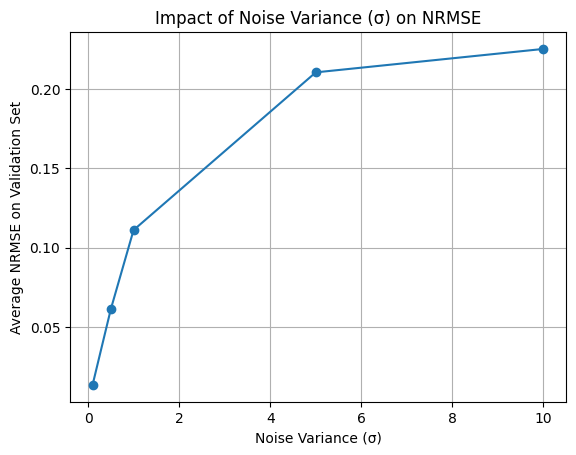

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic data with noise variance sigma
def generate_data(m, n, sigma):
    np.random.seed(42)#enabling  to get the same random data across multiple runs of the code, which is important for consistency in testing and evaluation.
    X = np.random.randn(m, n)  # random feature matrix (m samples, n features)
    true_w = np.random.randn(n)  # true weights
    noise = np.random.normal(0, sigma, m)  # noise with variance sigma(mean,std Dev, size)
    t = np.dot(X, true_w) + noise  # target vector with noise
    return X, t

# Function to compute NRMSE
def compute_nrmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse / (np.max(y_true) - np.min(y_true))#this will return NRMSE

# Gradient Descent function for linear regression
def gradient_descent(X, y, lr=0.01, max_iter=1000, tol=1e-6):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights
    b = 0  # Initialize bias term

    for _ in range(max_iter):
        y_pred = np.dot(X, w) + b  # Predicted values
        errors = y_pred - y

        # Gradient of the loss function
        w_grad = (1 / m) * np.dot(X.T, errors)
        b_grad = (1 / m) * np.sum(errors)

        # Update weights and bias
        w -= lr * w_grad
        b -= lr * b_grad

        # Stopping criterion based on cost change (not implemented for simplicity)

    return w, b

# Main experiment function
def experiment(m=100, n=10, sigma_values=[0.1, 0.5, 1, 5, 10], num_runs=5):
    avg_nrmse_list = []

    for sigma in sigma_values:
        nrmse_runs = []

        for _ in range(num_runs):
            # Generate data
            X, t = generate_data(m, n, sigma)

            # Split data into training and validation subsets (80% train, 20% validation)
            split_idx = int(0.8 * m)
            X_train, X_val = X[:split_idx], X[split_idx:]#X[:split_idx] give 80% from start for training and X[split_idx:] give 20% remainig upto end
            t_train, t_val = t[:split_idx], t[split_idx:]#same this also

            # Train the model using gradient descent
            w, b = gradient_descent(X_train, t_train)

            # Predict on validation subset
            t_val_pred = np.dot(X_val, w) + b

            # Compute NRMSE for validation subset
            nrmse = compute_nrmse(t_val, t_val_pred)
            nrmse_runs.append(nrmse)

        # Average NRMSE over runs for this value of sigma
        avg_nrmse_list.append(np.mean(nrmse_runs))

    # Plot average NRMSE vs. sigma
    plt.plot(sigma_values, avg_nrmse_list, marker='o')
    plt.xlabel("Noise Variance (σ)")
    plt.ylabel("Average NRMSE on Validation Set")
    plt.title("Impact of Noise Variance (σ) on NRMSE")
    plt.grid(True)
    plt.show()

    return avg_nrmse_list

# Run the experiment
sigma_values = [0.1, 0.5, 1, 5, 10]
avg_nrmse_results = experiment(sigma_values=sigma_values)





#Observation
For low Noise: As noise variance is very low, the model should achieve low NRMSE on the validation set because the data is almost noise-free, allowing the model to fit more accurately.
For increasing Noise (σ > 0): As noise variance increases, the model's predictions become less accurate because the noise makes it harder for the model to learn the true underlying relationship, leading to an increase in NRMSE.
 The plot  show that NRMSE increases with increasing noise variance, which reflects how noise adversely affects model performance.

##10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and noise variance σ. Comment on the results.

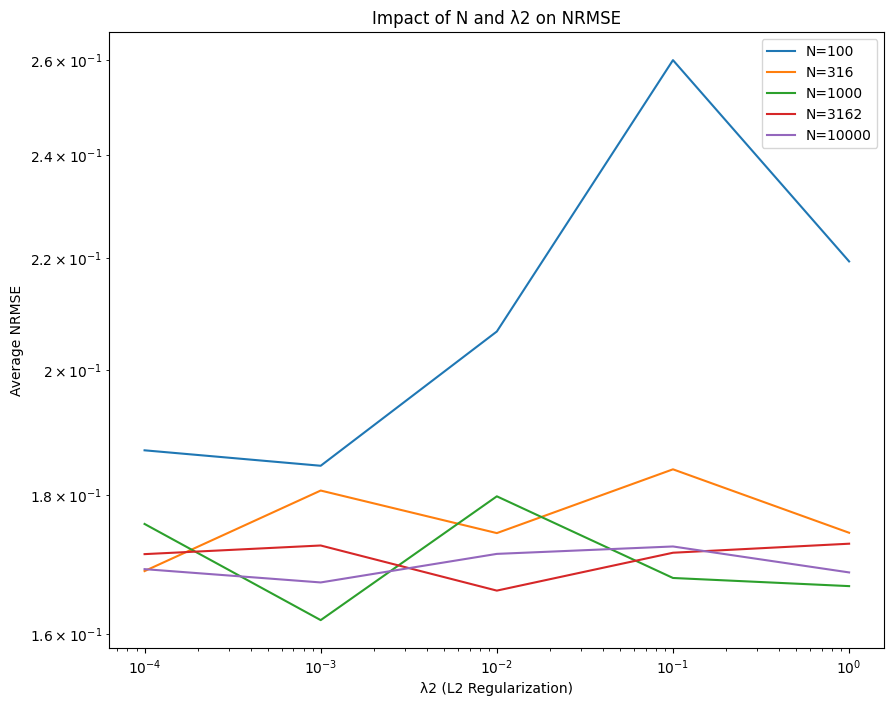

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split#To split the data into training and validation sets.
from sklearn.metrics import mean_squared_error#To compute the mean squared error (MSE) for NRMSE calculation.
from sklearn.linear_model import Ridge# used for linear regression with L2 regularization ( Ridge regression).
import matplotlib.pyplot as plt

# Fixed generator matrix G
G = np.random.randn(50, 20)  # Example generator matrix

# Fixed noise variance
sigma = 0.1

# Values for N and λ2 (log scale)
N_values = [100, 316, 1000, 3162, 10000]
lambda2_values = [1e-4, 1e-3, 1e-2, 1e-1, 1]

# Storage for results
results = np.zeros((len(N_values), len(lambda2_values)))

# Run experiment for each N and λ2 pair
for i, N in enumerate(N_values):
    for j, lambda2 in enumerate(lambda2_values):
        nrmse_list = []
        for run in range(5):  # Run experiment 5 times
            # Generate random data matrix X and target vector t with noise
            X = np.random.randn(N, G.shape[1])
            t = X @ G.mean(axis=0) + np.random.normal(0, sigma, N)

            # Split into training 80% and validation 20%
            X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2)

            # Train using Ridge Regression (L2 regularization)
            model = Ridge(alpha=lambda2, solver='saga')  # saga supports gradient descent
            model.fit(X_train, t_train)

            # Predict on validation set and calculate NRMSE
            predictions = model.predict(X_val)
            nrmse = np.sqrt(mean_squared_error(t_val, predictions)) / np.std(t_val)
            nrmse_list.append(nrmse)

        # Average NRMSE for this N, λ2 pair
        results[i, j] = np.mean(nrmse_list)

# Plotting the results
plt.figure(figsize=(10, 8))
for i, N in enumerate(N_values):
    plt.plot(lambda2_values, results[i, :], label=f'N={N}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('λ2 (L2 Regularization)')
plt.ylabel('Average NRMSE')
plt.title('Impact of N and λ2 on NRMSE')
plt.legend()
plt.show()




#Observation
Impact of N:

Larger N: As the number of samples increases, the model should have more data to learn from, leading to a more accurate fit. Therefore, NRMSE should generally decrease as N increases, provided the regularization is appropriate.

Impact of λ2:

Larger λ2: Increasing λ2 increases the strength of regularization, which can shrink the coefficients. If λ2 is too large, the model may be overly regularized, leading to underfitting (higher NRMSE). Conversely, if λ2 is too small, the model may overfit, which could also result in poor generalization (higher NRMSE).
Balance Between N and λ2: The interaction between N and λ2 will show whether having more data can help mitigate the effects of strong regularization.

##11. Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat the experiment. Are the results different? Comment on the results.

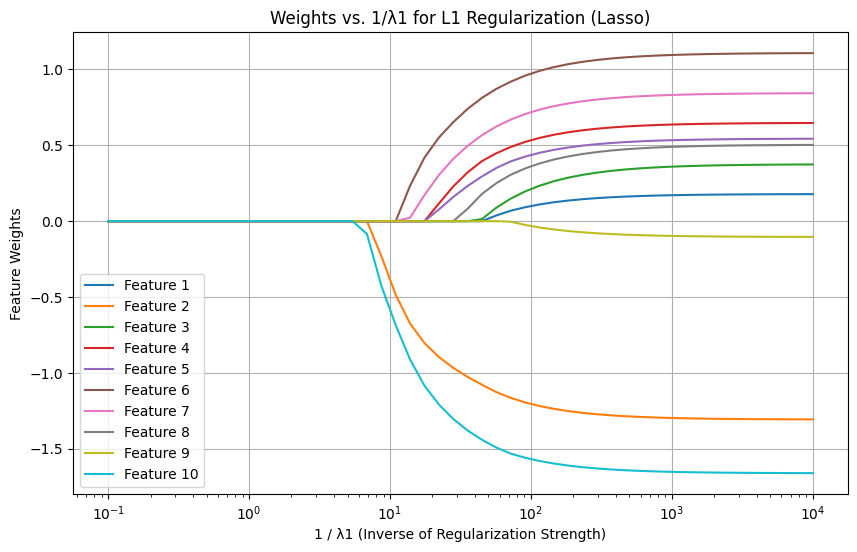

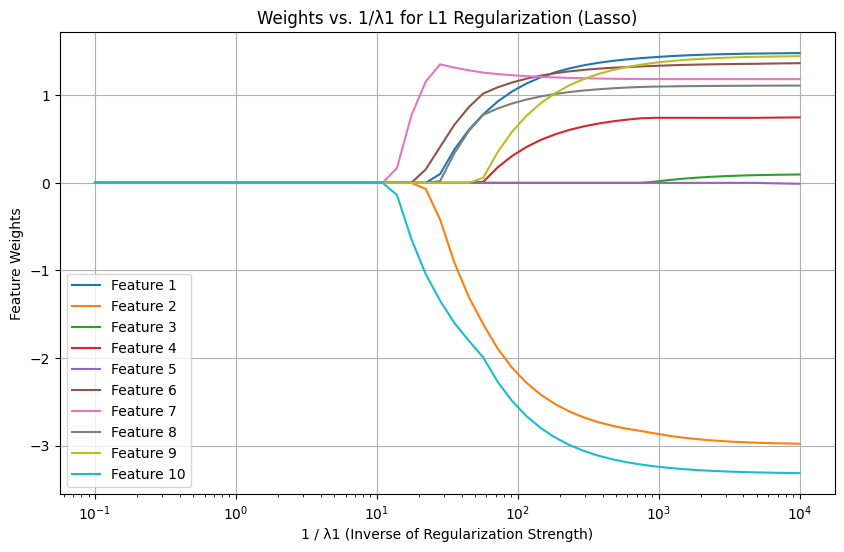

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso#apply Lasso regression (L1 regularization).
from sklearn.model_selection import train_test_split# used to split data into training and validation set
from sklearn.metrics import mean_squared_error

# Function to plot weights vs. 1/lambda1
def plot_weights_vs_lambda1(X, t, lambda1_values):
    weights = []
    for lambda1 in lambda1_values:
      # Lasso model is trained on the data
        lasso = Lasso(alpha=lambda1)
        lasso.fit(X, t)
        weights.append(lasso.coef_)#feature coefficients (weights) are stored.

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[1]):
        plt.plot(1 / lambda1_values, [w[i] for w in weights], label=f'Feature {i+1}')

    plt.xscale('log')
    plt.xlabel('1 / λ1 (Inverse of Regularization Strength)')
    plt.ylabel('Feature Weights')
    plt.title('Weights vs. 1/λ1 for L1 Regularization (Lasso)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Generate random data matrix X and target vector t
np.random.seed(42)
n_samples = 100
n_features = 10
X = np.random.rand(n_samples, n_features)
true_weights = np.random.randn(n_features)
t = X @ true_weights + 0.1 * np.random.randn(n_samples)  # Target vector with noise

# Set of lambda1 values (L1 regularization parameter)
lambda1_values = np.logspace(-4, 1, 50)  # λ1 values on a log scale

# Plot for original uncorrelated data
plot_weights_vs_lambda1(X, t, lambda1_values)

# Now introduce correlations in the columns of X
# Introduce correlation by combining columns
X_correlated = X.copy()
for i in range(1, n_features):
    X_correlated[:, i] = X_correlated[:, i] * 0.5 + X_correlated[:, i-1] * 0.5

# Plot for correlated data
plot_weights_vs_lambda1(X_correlated, t, lambda1_values)



#Observation
upper  plot withiut correlation and lower with correlation...
Effect of
𝜆
1
 : As
𝜆
1
  increases, more features are driven towards zero (i.e., eliminated), especially when there are no correlations. With correlated features, the Lasso may retain both features due to multicollinearity, thus reducing the effectiveness of L1 regularization for feature elimination.

Importance of Feature Correlations: Correlated features pose a challenge for Lasso regression, and the resulting weights may not shrink to zero as expected for highly correlated predictors.
This experiment illustrates how Lasso (L1 regularization) affects feature weights depending on the regularization strength. Regularization forces some coefficients to zero, especially in the presence of correlations, where Lasso effectively performs automatic feature selection, potentially ignoring redundant features

##12. Show the grouping effect of elastic net on correlated columns of X.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.162e+05, tolerance: 1.556e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.536e+04, tolerance: 1.556e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.387e+04, tolerance: 1.556e

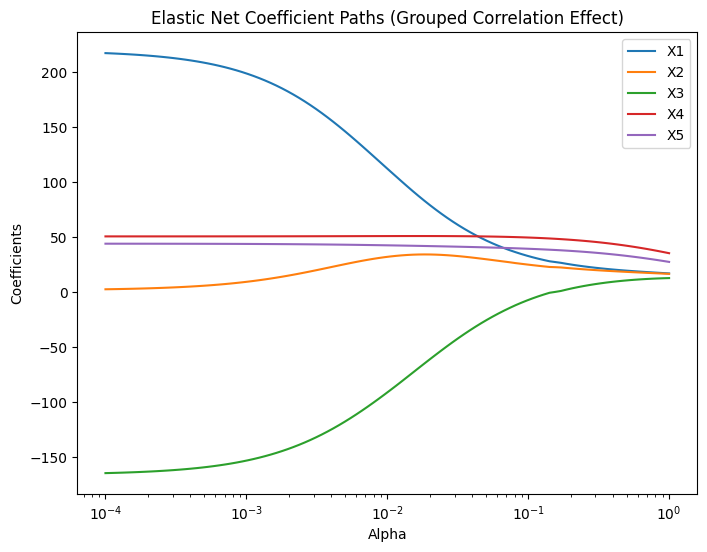

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet#This model combines L1 (Lasso) and L2 (Ridge) regularization, providing a balance between feature selection and shrinkage of coefficients.
from sklearn.datasets import make_regression#used to generate a synthetic dataset for regression problems
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
X[:, 1] = X[:, 0] + 0.1 * np.random.randn(100)  # Introduce correlation between X[0] and X[1]
X[:, 2] = X[:, 0] + 0.1 * np.random.randn(100)  # Introduce correlation between X[0] and X[2]

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Elastic Net model
alphas = np.logspace(-4, 0, 100)  # Range of alpha values
coefs = []
for alpha in alphas:
    model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # 50% Lasso (L1) + 50% Ridge (L2)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

# Plot the coefficient paths
coefs = np.array(coefs)
plt.figure(figsize=(8, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'X{i+1}')


#plot
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Elastic Net Coefficient Paths (Grouped Correlation Effect)')
plt.legend(loc='best')
plt.axis('tight')
plt.show()




#Observation
The Elastic Net regularization demonstrates a "grouping effect" on correlated features. As the regularization strength
𝛼
α increases, correlated features
𝑋
1
​
  and
𝑋
2
  shrink together, reflecting the influence of the L2 (Ridge) penalty. Unlike Lasso, which may zero out one feature in a correlated group, Elastic Net encourages group selection, shrinking all correlated features uniformly. This results in more stable and interpretable models, retaining important features while applying smooth, uniform shrinkage.

##13. Write a function for generating linear binary classification vector t with noise variance σ.

In [ ]:


def generate_linear_binary_classification_vector(n_samples, n_features, weight, bias, sigma):

    # Generate random feature matrix X of shape (n_samples, n_features)
    X = np.random.randn(n_samples, n_features)

    # Compute the linear combination: X * weight + bias
    linear_combination = np.dot(X, weight) + bias

    # Add Gaussian noise with standard deviation sigma
    noisy_output = linear_combination + sigma * np.random.randn(n_samples)

    # Apply a threshold to generate binary labels (t)
    t = np.where(noisy_output > 0, 1, 0)

    return t, X

# following parameter take
n_samples = 100
n_features = 5
weight = np.array([0.3, -0.2, 0.5, 0.1, -0.7])  # Random weights for features
bias = 0.1  # Bias term
sigma = 0.3  # Standard deviation of the noise

t, X = generate_linear_binary_classification_vector(n_samples, n_features, weight, bias, sigma)#call the functio that return t,x

print( "Binary classification vector of size (n_samples,) \n" +str(t[:10]))  # Show the first 10 labels
print( "Feature matrix of size (n_samples, n_features) \n" +str(X[:5]))   # Show the first 5 samples of the feature matrix





Binary classification vector of size (n_samples,) 
[1 1 1 0 1 1 1 1 1 0]
Feature matrix of size (n_samples, n_features) 
[[ 0.61703017  0.36738869 -0.10910852 -0.48859758 -0.26899451]
 [ 1.56517193 -0.86586644 -0.71924334 -0.76314882  0.13575388]
 [-1.52470545 -1.35355986 -0.26095483 -1.28777545 -1.20627131]
 [-1.28026841 -0.84661171  0.73124651  0.95570796  1.91900089]
 [ 1.88236186  0.78631271  1.02767767  0.13110209  0.51986485]]


#Observation
The function generates a synthetic dataset for binary classification by creating a feature matrix with random values, computing a linear combination of the features, and adding Gaussian noise controlled by
σ. It then applies a threshold to the noisy output to generate binary labels (0 or 1). The noise level
σ can be adjusted, allowing control over the difficulty of the classification task. This function is useful for testing and evaluating binary classification models with customizable noise and feature-label relationships.

##14.Write a function for computing gradient of binary cross-entropy for logistic regression

In [ ]:


def sigmoid(z):
    """
    Sigmoid activation function.
    """
    return 1 / (1 + np.exp(-z))

def compute_binary_cross_entropy_gradient(X, y, w, b):

    # Number of samples
    N = X.shape[0]

    # Compute the linear combination (z = X * w + b)
    z = np.dot(X, w) + b

    # Compute the sigmoid function (h(x))
    predictions = sigmoid(z)

    # Compute the gradient with respect to weights
    gradient_w = (1 / N) * np.dot(X.T, (predictions - y))

    # Compute the gradient with respect to bias
    gradient_b = (1 / N) * np.sum(predictions - y)

    return gradient_w, gradient_b


N = 100  # Number of samples
d = 5    # Number of features
X = np.random.randn(N, d)  # Random feature matrix
y = np.random.randint(0, 2, N)  # Random binary labels
w = np.random.randn(d)  # Random weight vector
b = np.random.randn()   # Random bias

gradient_w, gradient_b = compute_binary_cross_entropy_gradient(X, y, w, b)

print("Gradient with respect to weights:", gradient_w)
print("Gradient with respect to bias:", gradient_b)


Gradient with respect to weights: [ 0.09123952 -0.09955247  0.23709905  0.07653853  0.03691345]
Gradient with respect to bias: -0.21716038657365558


#Observation
The function computes the gradient of the binary cross-entropy loss for logistic regression. It uses the sigmoid function to transform the linear combination of inputs into probabilities. The gradient with respect to the weights is calculated as the dot product of the feature matrix and the error term, while the gradient for the bias is the average of the error. These gradients guide the optimization process in gradient descent, allowing the model to adjust weights and bias to minimize the loss and improve its binary classification performance.

##15. Repeat experiment 10 for binary classification.

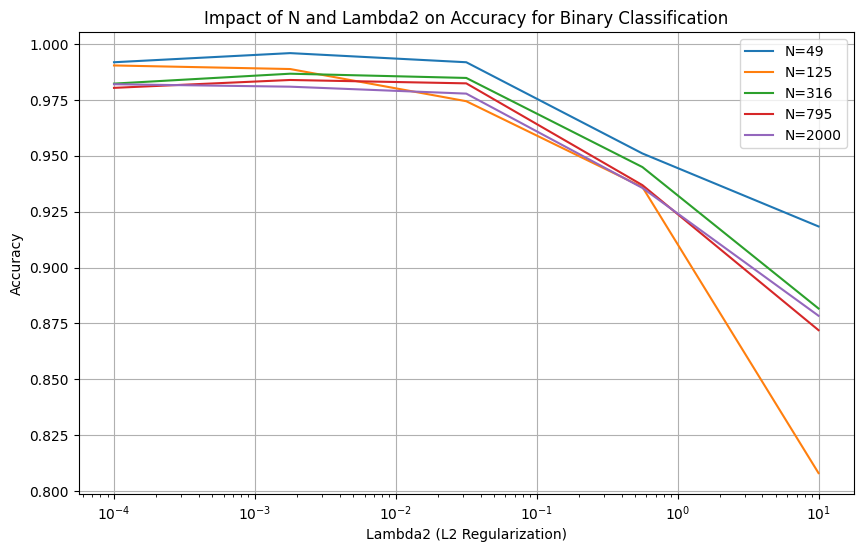

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_binary_data(N, d, G, sigma):
    """
    Generates synthetic binary classification data with noise.
    """
    X = np.random.randn(N, d) @ G  # Feature matrix
    true_weights = np.random.randn(d)  # True weights
    z = X @ true_weights + np.random.normal(0, sigma, size=N)  # Linear combination with noise
    t = 1 / (1 + np.exp(-z))  # Sigmoid activation
    t = (t > 0.5).astype(int)  # Convert to binary labels
    return X, t

def sigmoid(x):
    """
    Sigmoid activation function.
    """
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy_loss(y_true, y_pred):
    """
    Computes binary cross-entropy loss.
    """
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent_logistic(X, t, lambda2, learning_rate=0.01, epochs=1000):
    """
    Performs gradient descent for logistic regression with L2 regularization.
    """
    N, d = X.shape
    w = np.zeros(d)
    b = 0
    for _ in range(epochs):
        z = X @ w + b
        predictions = sigmoid(z)#sigmoid of z
        error = predictions - t#error calculation
        gradient_w = (1/N) * X.T @ error + 2 * lambda2 * w  # Gradient for weights with L2 regularization
        gradient_b = (1/N) * np.sum(error)# Gradient for b with L2 regularization
        w -= learning_rate * gradient_w#update w
        b -= learning_rate * gradient_b#update b
    return w, b

def compute_accuracy(y_true, y_pred):
    """
    Computes accuracy for binary classification.
    """
    return np.mean((y_true == (y_pred > 0.5)).astype(int))

def run_experiment_binary_classification(N_values, lambda2_values, d, G, sigma, num_runs=5):
    """
    Runs experiments to compute accuracy for different N and lambda2 values.
    """
    results = np.zeros((len(N_values), len(lambda2_values)))
    for i, N in enumerate(N_values):
        for j, lambda2 in enumerate(lambda2_values):
            accuracy_list = []#Initializes an empty list to store the accuracy for each run for the current pair of N and lambda2.
            for _ in range(num_runs):
                X, t = generate_binary_data(N, d, G, sigma)
                w, b = gradient_descent_logistic(X, t, lambda2)# Trains a logistic regression model with L2 regularization using gradient descent
                z = X @ w + b# Computes the linear combination of the features X and the weights w with the bias b added.
                predictions = sigmoid(z)
                accuracy = compute_accuracy(t, predictions)# Computes the accuracy of the predictions by comparing them with the true target values t
                accuracy_list.append(accuracy)# append the above
            results[i, j] = np.mean(accuracy_list)#store result
    return results

# Set parameters for the experiment
N_values = np.logspace(np.log10(50), np.log10(2000), 5).astype(int)  # Sample sizes
lambda2_values = np.logspace(-4, 1, 5)  # L2 regularization values
d = 10  # Number of features
G = np.random.randn(d, d)  # Generator matrix
sigma = 0.1  # Noise variance

# Run the experiment
results = run_experiment_binary_classification(N_values, lambda2_values, d, G, sigma)

# Plot the results
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_values):
    plt.plot(lambda2_values, results[i, :], label=f'N={N}')

plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Lambda2 (L2 Regularization)')
plt.ylabel('Accuracy')
plt.title('Impact of N and Lambda2 on Accuracy for Binary Classification')
plt.legend()
plt.grid(True)
plt.show()



#Observation
Larger sample sizes (
N) generally improve model accuracy by helping it generalize better, while smaller sample sizes increase the risk of overfitting and lower accuracy. Stronger regularization (
𝜆
2
 ) reduces overfitting but can introduce bias, leading to lower accuracy, especially with smaller datasets. For larger datasets, stronger regularization is beneficial, while for smaller datasets, weaker regularization is often better, though it risks overfitting.